# Project 3- Bitcoin’s Price Correlation with the Stock Market & BTC Price Prediction 
## Analyzing the evolution of Bitcoin’s price correlation with the stock market over time

## Part 2: BTC performance analysis with the market to see if correlation has changed over time 

## Has there been a change in how Bitcoin’s price moves with the market?

### ETFs to analyze:
* SPY (Overall)- Chose SPY as a benchmark to see how the overall market performed
* BTC (Crypto Currency)- Chose BTC as the benchmark crypto to analyze
* ETH (Crypto Currency)- Chose ETC to see if it follows BTC or if it’s an anomaly
* XRP (Crypto Currency)- Chose XRP to see if it follows BTC or if it’s an anomaly

In [1]:
# Imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')


Bad key savefig.frameon in file /opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probab

## Price movement analysis- time period: 1/1/18- 12/31/21

In [2]:
# Read SPY Data and get rid of extra columns 
SPY_Data= pd.read_csv("SPY_P3.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
SPY_Data = SPY_Data.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
SPY_Data.head()

,Close
Date,
2018-01-02,268.769989
2018-01-03,270.470001
2018-01-04,271.609985
2018-01-05,273.420013
2018-01-08,273.920013


In [3]:
# Read BTC Data and get rid of extra columns 
BTC_Data= pd.read_csv("BTC_P3.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
BTC_Data = BTC_Data.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
BTC_Data.head()

,Close
Date,
2018-01-01,13657.200195
2018-01-02,14982.099609
2018-01-03,15201.000000
2018-01-04,15599.200195
2018-01-05,17429.500000


In [4]:
# Read ETH Data and get rid of extra columns 
ETH_Data= pd.read_csv("ETH_P3.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
ETH_Data = ETH_Data.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
ETH_Data.head()

,Close
Date,
2018-01-01,772.640991
2018-01-02,884.443970
2018-01-03,962.719971
2018-01-04,980.921997
2018-01-05,997.719971


In [5]:
# Read XRP Data and get rid of extra columns 
XRP_Data= pd.read_csv("XRP_P3.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
XRP_Data = XRP_Data.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
XRP_Data.head()

,Close
Date,
2018-01-01,2.39103
2018-01-02,2.48090
2018-01-03,3.10537
2018-01-04,3.19663
2018-01-05,3.04871


In [6]:
# Check data types
SPY_Data.dtypes

Close    float64
dtype: object

In [7]:
BTC_Data.dtypes

Close    float64
dtype: object

In [8]:
ETH_Data.dtypes

Close    float64
dtype: object

In [9]:
XRP_Data.dtypes

Close    float64
dtype: object

In [10]:
# Calculate SPY Daily Returns
SPY_Returns= SPY_Data.pct_change()
SPY_Returns.head()

,Close
Date,
2018-01-02,NaN
2018-01-03,0.006325
2018-01-04,0.004215
2018-01-05,0.006664
2018-01-08,0.001829


In [11]:
# Rename `Close` Column to be specific to this stock and drop nulls.
SPY_Returns.columns=["SPY"]
SPY_Returns.dropna(inplace=True)
SPY_Returns.head()

,SPY
Date,
2018-01-03,0.006325
2018-01-04,0.004215
2018-01-05,0.006664
2018-01-08,0.001829
2018-01-09,0.002263


In [12]:
# Calculate BTC Daily Returns
BTC_Returns= BTC_Data.pct_change()
BTC_Returns.head()

,Close
Date,
2018-01-01,NaN
2018-01-02,0.097011
2018-01-03,0.014611
2018-01-04,0.026196
2018-01-05,0.117333


In [13]:
# Rename `Close` Column to be specific to this stock and drop nulls.
BTC_Returns.columns=["BTC"]
BTC_Returns.dropna(inplace=True)
BTC_Returns.head()

,BTC
Date,
2018-01-02,0.097011
2018-01-03,0.014611
2018-01-04,0.026196
2018-01-05,0.117333
2018-01-06,0.005594


In [14]:
# Calculate ETH Daily Returns
ETH_Returns= ETH_Data.pct_change()
ETH_Returns.head()

,Close
Date,
2018-01-01,NaN
2018-01-02,0.144702
2018-01-03,0.088503
2018-01-04,0.018907
2018-01-05,0.017125


In [15]:
# Rename `Close` Column to be specific to this stock and drop nulls.
ETH_Returns.columns=["ETH"]
ETH_Returns.dropna(inplace=True)
ETH_Returns.head()

,ETH
Date,
2018-01-02,0.144702
2018-01-03,0.088503
2018-01-04,0.018907
2018-01-05,0.017125
2018-01-06,0.044061


In [16]:
# Calculate XRP Daily Returns
XRP_Returns= XRP_Data.pct_change()
XRP_Returns.head()

,Close
Date,
2018-01-01,NaN
2018-01-02,0.037586
2018-01-03,0.251711
2018-01-04,0.029388
2018-01-05,-0.046274


In [17]:
# Rename `Close` Column to be specific to this stock and drop nulls.
XRP_Returns.columns=["XRP"]
XRP_Returns.dropna(inplace=True)
XRP_Returns.head()

,XRP
Date,
2018-01-02,0.037586
2018-01-03,0.251711
2018-01-04,0.029388
2018-01-05,-0.046274
2018-01-06,0.014846


## Conduct Quantitative Analysis

### Performance Analysis

In [18]:
# Join SPY Returns, BTC Returns, ETH Returns and XRP Returns into a single DataFrame with columns for each stock's returns.
Combined_Returns = pd.concat([SPY_Returns, BTC_Returns, ETH_Returns, XRP_Returns], axis='columns', join='inner')
Combined_Returns.dropna(inplace=True)
Combined_Returns.head()

,SPY,BTC,ETH,XRP
Date,,,,
2018-01-03,0.006325,0.014611,0.088503,0.251711
2018-01-04,0.004215,0.026196,0.018907,0.029388
2018-01-05,0.006664,0.117333,0.017125,-0.046274
2018-01-08,0.001829,-0.079350,-0.004024,-0.272840
2018-01-09,0.002263,-0.037884,0.131655,-0.144300


In [19]:
# Plot cumulative returns with an hvplot for 2018-2021
Combined_Returns.hvplot.line(xlabel="Date", ylabel="Daily Return", width= 1000)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

<AxesSubplot:title={'center':'Combined Returns of SPY, BTC, ETH and XRP for 2018-2021'}, xlabel='Date'>

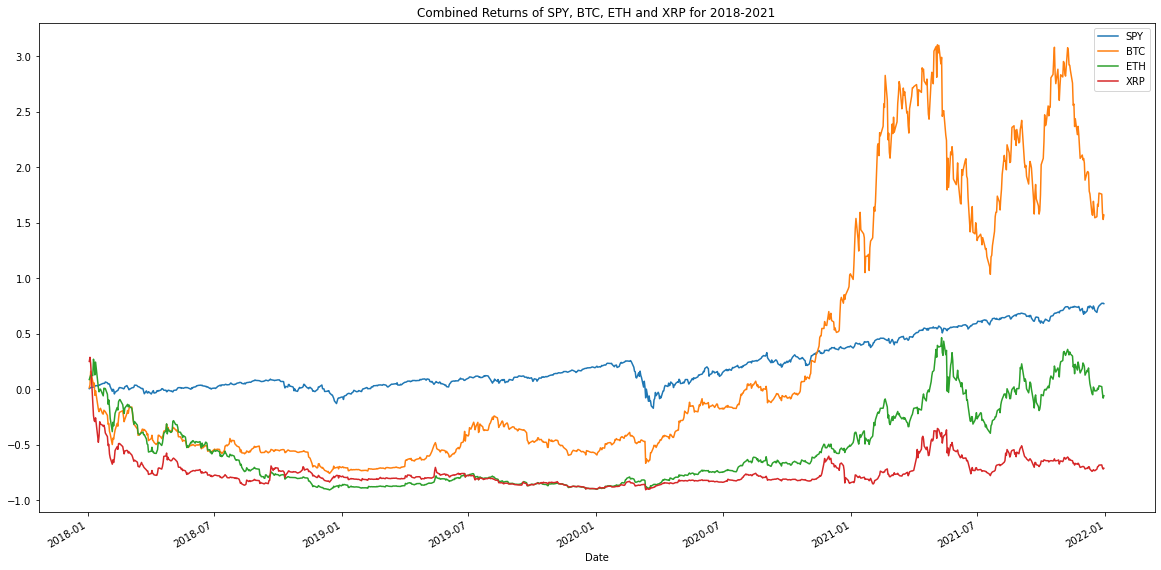

In [20]:
# Calculate and plot cumulative returns of the combined returns for 2018-2021
Combined_Returns = (1 + Combined_Returns.sort_index()).cumprod()-1
# Plot cumulative returns for 2018-2021
Combined_Returns.plot(figsize=(20,10), title= "Combined Returns of SPY, BTC, ETH and XRP for 2018-2021")

### Correlation Between Bitcoin Returns and S&P 500 Index
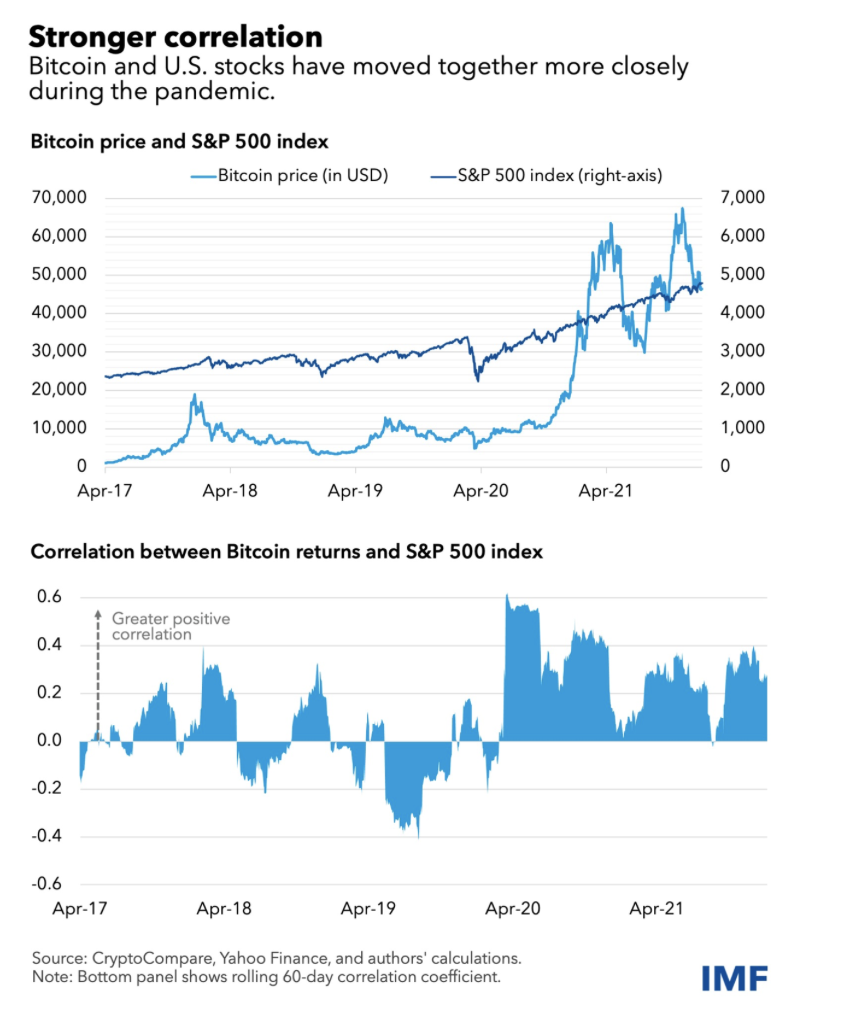

### How did the relationship between BTC and SPY change over time?
From 2018 to 2019, we can see that BTC, ETH and XRP move more closely together while SPY follows its own path. But in 2020, we see BTC breakaway from its pattern with the other cryptocurrencies and become more strongly correlated with SPY. From 2020 to 2021, we also see how BTC’s volatility increases drastically. The change in relationship between BTC and SPY can be attributed to the change of sentiment in crypto as well as increased market liquidity caused by the pandemic. 

### Risk Analysis

#### Standard Deviation

In [21]:
# Calculate the daily standard deviation of each stock
Combined_Returns_std = Combined_Returns.std()
Combined_Returns_std

SPY    0.235799
BTC    1.139674
ETH    0.352087
XRP    0.125778
dtype: float64

In [22]:
Combined_Returns.rolling(window=21).std().hvplot(figsize=[30,10], title="Rolling 21-Day Standard Deviation", width= 1000)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

#### Volatility

In [23]:
# Plot cumulative returns on a density plot to see volatility
Combined_Returns.hvplot.density(width= 1000)

:NdOverlay   [Variable]
   :Distribution   [value]   (Density)

#### Correlation

In [24]:
# Calculate the correlation of all stocks
Correlation= Combined_Returns.corr()
Correlation

,SPY,BTC,ETH,XRP
SPY,1.000000,0.912598,0.741891,0.325805
BTC,0.912598,1.000000,0.845071,0.478520
ETH,0.741891,0.845071,1.000000,0.766418
XRP,0.325805,0.478520,0.766418,1.000000


In [25]:
import seaborn as sns

<AxesSubplot:>

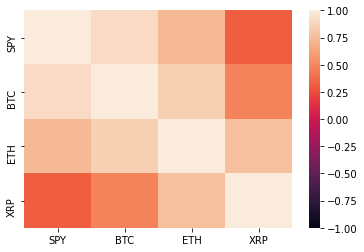

In [26]:
# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(Correlation, vmin=-1, vmax=1)

#### Beta between SPY and BTC

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BTC'}, xlabel='Date'>

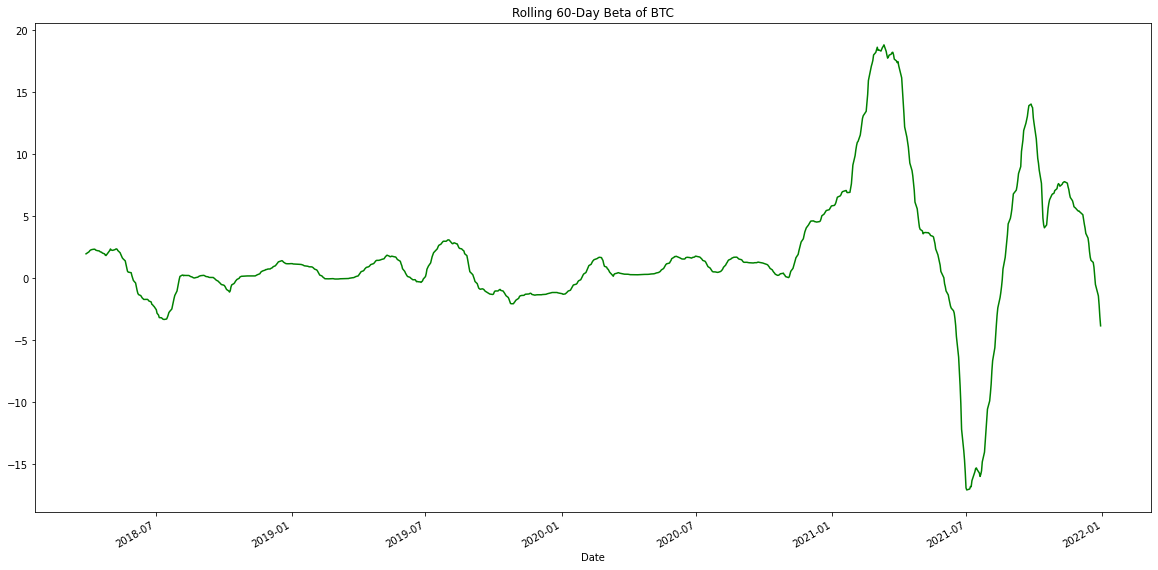

In [27]:
# Calculate covariance of a single stock
Covariance_BTC = Combined_Returns["BTC"].rolling(window=60).cov(Combined_Returns["SPY"])
# Calculate variance of SPY
Variance_SPY = Combined_Returns["SPY"].rolling(window=60).var()
# Computing beta
Rolling_Beta_BTC = Covariance_BTC/Variance_SPY
# Plot beta trend
Rolling_Beta_BTC.plot(figsize=(20, 10), title="Rolling 60-Day Beta of BTC", color= "green")

### Beta vs. Correlation

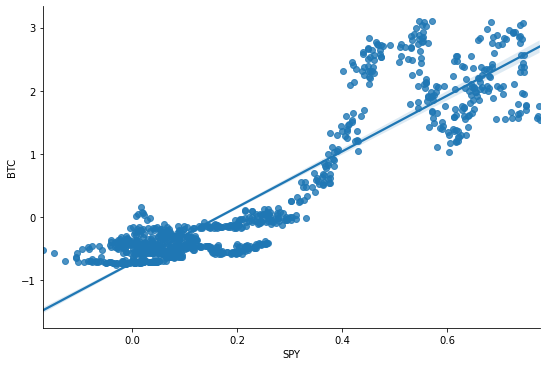

In [28]:
# Showcase beta vs. correlation by plotting a scatterplot using the Seaborn library and fitting a regression line
import seaborn as sns
sns.lmplot(x="SPY", y="BTC", data=Combined_Returns, aspect=1.5, fit_reg=True)

In [29]:
# Calculate covariance of all daily returns of BTC vs. SPY
Covariance = Combined_Returns["BTC"].cov(Combined_Returns["SPY"])
Covariance

0.2452462613257003

In [30]:
# Calculate variance of all daily returns of BTC vs. SPY
Variance = Combined_Returns["SPY"].var()
Variance

0.05560122797031361

In [31]:
# Calculate beta of all daily returns of BTC
BTC_Beta = Covariance / Variance
BTC_Beta

4.410806564499641

## Analysis of Beta vs Correlation (SPY & BTC)
From the plot we can see that Bitcoin's price tends to be a lot more volatile than the market, while correlation shows that although Bitcoin and SPY are not perfectly correlated, they are very highly correlated.

#### Beta between SPY and ETH

<AxesSubplot:title={'center':'Rolling 60-Day Beta of ETH'}, xlabel='Date'>

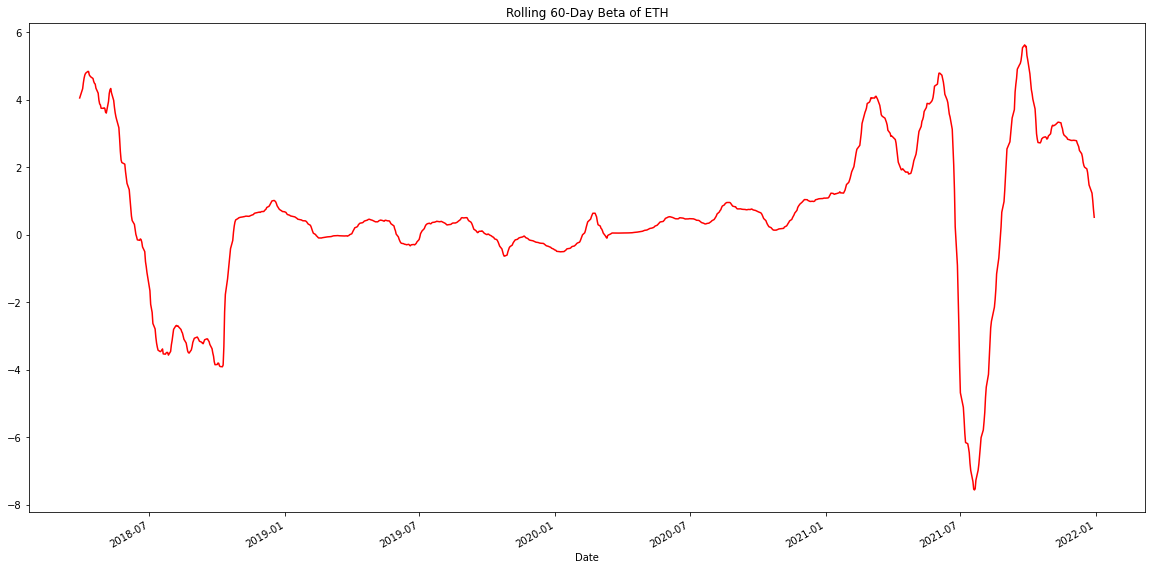

In [32]:
# Calculate covariance of a single stock
Covariance_ETH = Combined_Returns["ETH"].rolling(window=60).cov(Combined_Returns["SPY"])
# Calculate variance of SPY
Variance_SPY = Combined_Returns["SPY"].rolling(window=60).var()
# Computing beta
Rolling_Beta_ETH = Covariance_ETH/Variance_SPY
# Plot beta trend
Rolling_Beta_ETH.plot(figsize=(20, 10), title="Rolling 60-Day Beta of ETH", color= "red")

#### Beta between SPY and XRP

<AxesSubplot:title={'center':'Rolling 60-Day Beta of XRP'}, xlabel='Date'>

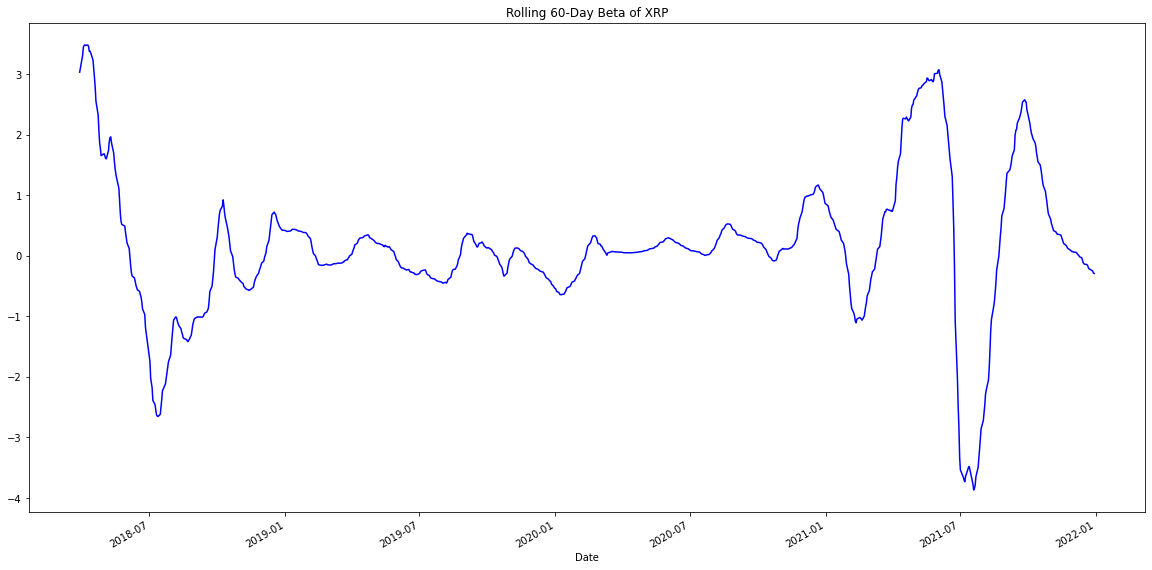

In [33]:
# Calculate covariance of a single stock
Covariance_XRP = Combined_Returns["XRP"].rolling(window=60).cov(Combined_Returns["SPY"])
# Calculate variance of SPY
Variance_SPY = Combined_Returns["SPY"].rolling(window=60).var()
# Computing beta
Rolling_Beta_XRP = Covariance_XRP/Variance_SPY
# Plot beta trend
Rolling_Beta_XRP.plot(figsize=(20, 10), title="Rolling 60-Day Beta of XRP", color= "blue")

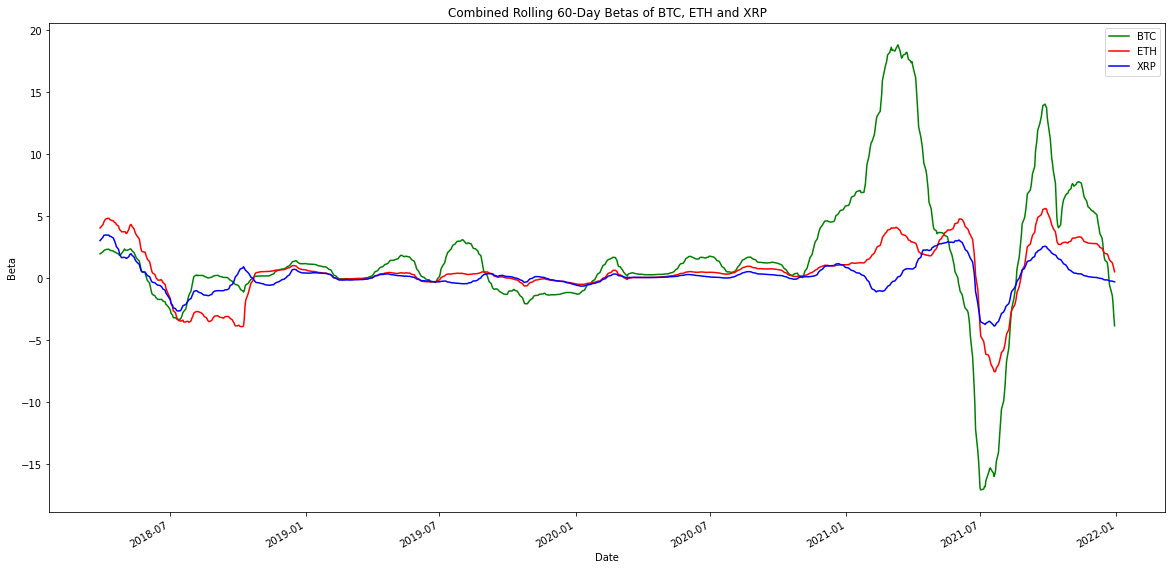

In [34]:
# Plotting both the curves simultaneously
Rolling_Beta_BTC.plot(figsize=(20,10), color= "green", label= "BTC")
Rolling_Beta_ETH.plot(figsize=(20,10),color= "red", label= "ETH")
Rolling_Beta_XRP.plot(figsize=(20,10), color= "blue", label= "XRP")
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Date")
plt.ylabel("Beta")
plt.title("Combined Rolling 60-Day Betas of BTC, ETH and XRP")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()                                                                        

### Sharpe Ratios

In [35]:
# Annualized Sharpe Ratio
Sharpe_Ratio = (Combined_Returns.mean() * 252) / (Combined_Returns.std() * np.sqrt(252))
Sharpe_Ratio

SPY    14.880570
BTC     3.462050
ETH   -24.480577
XRP   -94.539725
dtype: float64

<AxesSubplot:>

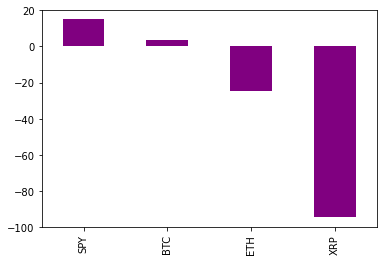

In [36]:
# Plot a bar plot
Sharpe_Ratio.plot.bar(color= "purple")

# Conclusion- Performance Analysis

## Data Analysis:
* **Standard Deviation**- Standard deviation is a measure of how far data points deviate from the mean. Volatile stocks have a higher standard deviation which indicates the stock has a higher risk. Looking at the standard deviation plot, BTC has a higher standard deviation than SPY, ETH and XRP which means it is more volatile. It’s also important to note that BTC’s standard deviation increases drastically in early 2021, which is when it becomes more strongly correlated with SPY.
* **Volatility**- Using the density plot, we can measure the volatility of the stock. The less volatile the stock, the smaller the standard deviation value. A smaller standard deviation means that the stock is less likely to have large (positive or negative) changes in value. Looking at the density plot, we see that BTC has the widest distribution making it more volatile because there is a greater percentage in price movement. This means there is a greater chance of observing a wider range of prices which we can also see from the fluctuation in both BTC’s prices and returns.
* **Correlation**- Correlation is the positive or negative relationship between two variables. From the correlation mix, we can see that BTC and SPY are not perfectly correlated so correlation does not imply causation. However, they are very highly correlated which suggests a strong relationship. SPY also seems to have a strong correlation with ETH while it has a low correlation with XRP. BTC has a high correlation with ETH, but it has a moderate correlation with XRP. ETH and XRP have a moderately high correlation with each other which suggests that when it comes to following SPY movement, XRP would be the anomaly.  
* **Beta**- Beta is a measure of the volatility—or systematic rick—of a security or portfolio compared to the overall market. Systematic risk is the risk that cannot be diversified away. BTC has a high beta which indicates that BTC’s price tends to be a lot more volatile than the market. Looking at the combined beta plot to compare BTC, ETH and XRP to SPY, we can see that BTC has the highest beta, and it is clearly more volatile than both ETH and SPY. If we want a diversified portfolio, we would need to add stocks that have less correlation and less volatility with the overall market. 
* **Sharpe Ratio**- The Sharpe ratio shows the risk-return relationship and how much return to expect per unit of risk. SPY gives the highest return for every unit of risk assumed by the investor while ETH and XRP give a negative return for every unit of risk assumed. BTC has a positive return per unit of risk which makes it a good addition to a portfolio. However, for diversification purposes, it could be worth adding XRP even though it gives a negative return because of its lower correlation with SPY and ETH.

# Part 2- Based on the performance analysis of BTC, create a portfolio simulation and give a recommendation

### Investor Profile: A potential investor has approached you looking for a portfolio recommendation. She's never considered investing in BTC but in the last 3 years, she has seen the shift in market sentiments towards cryptocurrency and wants to know how adding cryptocurrency to her portfolio would affect its overall performance. What is your recommendation?

* Risk tolerance- medium
* Age- 45
* Time horizon- 20 years
* Asset type- cryptocurrency
* Investment amount- $300,000

## Because the investor is optimistic about the market, create a long-position algorithm

### We want the trading algorithm to identify trading signals that indicate opportunities to buy BTC, so we need to identify the times when the short-window SMA is greater than the long-window SMA. When this happens, the price trend for BTC stock is moving upward in the short term and we want to own BTC stock during this time.

In [37]:
# Import the required libraries
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path

In [38]:
# Create a DataFrame filtering only the index and Close columns
BTC_df = pd.read_csv(("BTC_P3.csv"), index_col="Date", parse_dates=True, infer_datetime_format=True)

# Review the DataFrame
BTC_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072


In [39]:
# Filter the date index and close columns
signals_BTC_df = BTC_df.loc[:,["Close"]]

# Review the DataFrame
signals_BTC_df.head()

,Close
Date,
2018-01-01,13657.200195
2018-01-02,14982.099609
2018-01-03,15201.000000
2018-01-04,15599.200195
2018-01-05,17429.500000


In [40]:
signals_BTC_df.hvplot()

:Curve   [Date]   (Close)

In [41]:
# Set the short_window (50) and long window (100) variables
short_window = 50
long_window = 100

In [42]:
# Generate the short and long moving averages (50 and 100 days, respectively)
signals_BTC_df["SMA50"] = signals_BTC_df["Close"].rolling(window=short_window).mean()
signals_BTC_df["SMA100"] = signals_BTC_df["Close"].rolling(window=long_window).mean()

# Review the DataFrame
signals_BTC_df.head()

,Close,SMA50,SMA100
Date,,,
2018-01-01,13657.200195,NaN,NaN
2018-01-02,14982.099609,NaN,NaN
2018-01-03,15201.000000,NaN,NaN
2018-01-04,15599.200195,NaN,NaN
2018-01-05,17429.500000,NaN,NaN


In [43]:
# Review the DataFrame
signals_BTC_df.tail()

,Close,SMA50,SMA100
Date,,,
2021-12-27,50640.417969,54473.055625,54702.148125
2021-12-28,47588.855469,54073.496172,54705.434492
2021-12-29,46444.710938,53662.953828,54741.443594
2021-12-30,47178.125000,53306.611719,54806.288086
2021-12-31,46306.445313,52933.741406,54833.607461


In [44]:
# Create a column to hold the trading signal
signals_BTC_df["Signal"] = 0.0

In [45]:
# Generate the trading signal 0 or 1,
# where 1 is the short-window (SMA50) greater than the long-window (SMA100)
# and 0 is when the condition is not met

signals_BTC_df["Signal"][short_window:] = np.where(signals_BTC_df["SMA50"][short_window:] > signals_BTC_df["SMA100"][short_window:], 1.0, 0.0)

# Review the DataFrame
signals_BTC_df.tail(15)

,Close,SMA50,SMA100,Signal
Date,,,,
2021-12-17,46202.144531,57044.680859,54448.283047,1.0
2021-12-18,46848.777344,56737.097109,54452.856602,1.0
2021-12-19,46707.015625,56433.460781,54471.087656,1.0
2021-12-20,46880.277344,56144.687188,54487.875859,1.0
2021-12-21,48936.613281,55903.331328,54516.609297,1.0
2021-12-22,48628.511719,55611.373516,54553.263672,1.0
2021-12-23,50784.539063,55367.663360,54590.184141,1.0
2021-12-24,50822.195313,55155.062656,54616.642617,1.0
2021-12-25,50429.859375,54941.146328,54643.107617,1.0


In [46]:
# Calculate the points in time when the Signal value changes
# Identify trade entry (1) and exit (-1) points
signals_BTC_df["Entry/Exit"] = signals_BTC_df["Signal"].diff()

# Slice the DataFrame to confirm the Signal
# Review the DataFrame
signals_BTC_df.loc["2020-03-20":"2020-04-05"] 

,Close,SMA50,SMA100,Signal,Entry/Exit
Date,,,,,
2020-03-20,6198.778320,8631.530147,8267.669727,1.0,0.0
2020-03-21,6185.066406,8568.220889,8257.089048,1.0,0.0
2020-03-22,5830.254883,8496.968486,8242.694751,1.0,0.0
2020-03-23,6416.314941,8438.407481,8235.611162,1.0,0.0
2020-03-24,6734.803711,8387.233125,8231.436182,1.0,0.0
2020-03-25,6681.062988,8337.235127,8228.922007,1.0,0.0
2020-03-26,6716.440430,8279.295459,8229.681260,1.0,0.0
2020-03-27,6469.798340,8214.095391,8221.611216,0.0,-1.0
2020-03-28,6242.193848,8143.020400,8212.004712,0.0,0.0


In [47]:
# Visualize exit position relative to close price
exit = signals_BTC_df[signals_BTC_df["Entry/Exit"] == -1.0]["Close"].hvplot.scatter(
    color='red',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400)

In [48]:
# Show the plot
exit

:Scatter   [Date]   (Close)

In [49]:
# Visualize entry position relative to close price
entry = signals_BTC_df[signals_BTC_df['Entry/Exit'] == 1.0]['Close'].hvplot.scatter(
    color='green',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400)

In [50]:
# Show the plot
entry

:Scatter   [Date]   (Close)

In [51]:
# Visualize close price for the investment
security_close = signals_BTC_df[["Close"]].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400)

# Show the plot
security_close

:Curve   [Date]   (Close)

In [52]:
# Visualize moving averages
moving_avgs = signals_BTC_df[['SMA50', 'SMA100']].hvplot(
    ylabel='Price in $',
    width=1000,
    height=400)

# Show the plot
moving_avgs

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [53]:
# Create the overlay plot
entry_exit_plot = security_close * moving_avgs * entry * exit

# Show the plot
entry_exit_plot.opts(
    title="BTC- SMA50, SMA100, Entry and Exit Points"
)

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

### Summary
* With the overlay plot, we can identify the trading signals from the algorithm. Specifically, the green, upward-pointing arrows indicate the entry points, and the red, downward-pointing arrows indicate the exit points. 
* This algorithm can recognize the crossover points of the long- and short-window SMAs. A trade was entered when the “SMA50” value crossed above the “SMA100” value, and the trade was exited when the “SMA50” value crossed below the “SMA100” value.
* This trading strategy is called a long position because it focuses on first buying the stock, then holding it, and then selling it only when the short-term price trend turns lower. The investor makes a profit using the “buy low, sell high” strategy.

## Backtesting the Algorithm

### Now that we've built the algorithm, we can backtest its profitability. Backtesting is a method that allows us to assess how well a strategy works retrospectively, using historical data to validate how accurately the strategy would have predicted the actual results.

In [54]:
# Set initial capital
initial_capital = float(300000)

# Set the share size
share_size = 100

In [55]:
# Buy a 50 share position when the dual moving average crossover Signal equals 1
# Otherwise, `Position` should be zero (sell)
signals_BTC_df["Position"] = share_size * signals_BTC_df["Signal"]

In [56]:
# Determine the points in time where a 50 share position is bought or sold
signals_BTC_df["Entry/Exit Position"] = signals_BTC_df["Position"].diff()

In [57]:
# Multiply the close price by the number of shares held
signals_BTC_df["Portfolio Holdings"] = signals_BTC_df["Close"] * signals_BTC_df["Position"]

In [58]:
# Subtract the amount of either the cost or proceeds of the trade from the initial capital invested
signals_BTC_df["Portfolio Cash"] = initial_capital - (signals_BTC_df["Close"] * signals_BTC_df["Entry/Exit Position"]).cumsum() 


In [59]:
# Calculate the total portfolio value by adding the portfolio cash to the portfolio holdings (or investments)
signals_BTC_df["Portfolio Total"] = signals_BTC_df["Portfolio Cash"] + signals_BTC_df["Portfolio Holdings"]

In [60]:
# Calculate the portfolio daily returns
signals_BTC_df["Portfolio Daily Returns"] = signals_BTC_df["Portfolio Total"].pct_change()

In [61]:
# Calculate the portfolio cumulative returns
signals_BTC_df["Portfolio Cumulative Returns"] = (1 + signals_BTC_df["Portfolio Daily Returns"]).cumprod() - 1

In [62]:
# Print the DataFrame
signals_BTC_df.head(200)

,Close,SMA50,SMA100,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
Date,,,,,,,,,,,,
2018-01-01,13657.200195,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
2018-01-02,14982.099609,NaN,NaN,0.0,0.0,0.0,0.0,0.0,300000.0000,300000.0000,NaN,NaN
2018-01-03,15201.000000,NaN,NaN,0.0,0.0,0.0,0.0,0.0,300000.0000,300000.0000,0.0,0.000000
2018-01-04,15599.200195,NaN,NaN,0.0,0.0,0.0,0.0,0.0,300000.0000,300000.0000,0.0,0.000000
2018-01-05,17429.500000,NaN,NaN,0.0,0.0,0.0,0.0,0.0,300000.0000,300000.0000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-15,6359.640137,6766.446807,7627.479092,0.0,0.0,0.0,0.0,0.0,187191.9922,187191.9922,0.0,-0.376027
2018-07-16,6741.750000,6753.917402,7625.785693,0.0,0.0,0.0,0.0,0.0,187191.9922,187191.9922,0.0,-0.376027
2018-07-17,7321.040039,6757.618398,7628.760894,0.0,0.0,0.0,0.0,0.0,187191.9922,187191.9922,0.0,-0.376027


In [63]:
# Visualize exit position relative to total portfolio value
exit = signals_BTC_df[signals_BTC_df["Entry/Exit"] == -1.0]["Portfolio Total"].hvplot.scatter(
    color='yellow',
    marker='v',
    size=200,
    legend=False,
    ylabel="Total Portfolio Value",
    width=1000,
    height=400
)

# Visualize entry position relative to total portfolio value
entry = signals_BTC_df[signals_BTC_df["Entry/Exit"] == 1.0]["Portfolio Total"].hvplot.scatter(
    color='purple',
    marker='^',
    size=200,
    ylabel="Total Portfolio Value",
    width=1000,
    height=400
)

# Visualize the value of the total portfolio
total_portfolio_value = signals_BTC_df[["Portfolio Total"]].hvplot(
    line_color='lightgray',
    ylabel="Total Portfolio Value",
    xlabel="Date",
    width=1000,
    height=400
)

# Overlay the plots
portfolio_entry_exit_plot = total_portfolio_value * entry * exit
portfolio_entry_exit_plot.opts(
    title="BTC Algorithm - Total Portfolio Value",
    yformatter='%.0f'
)

:Overlay
   .Curve.I                    :Curve   [Date]   (Portfolio Total)
   .Scatter.Portfolio_Total.I  :Scatter   [Date]   (Portfolio Total)
   .Scatter.Portfolio_Total.II :Scatter   [Date]   (Portfolio Total)

In [64]:
# View max value of the portfolio total during the period
signals_BTC_df.loc["2021-04-13","Portfolio Total"]

5666619.629

In [65]:
# View final value of the portfolio total
signals_BTC_df.loc["2021-12-31","Portfolio Total"]

3185616.1134

### Interpreting Backtest Results from the Overlay Plot

* The Overlay Plot highlights the fact that the total value of the portfolio changed with each entry and exit of a 50-share position in BTC.
* With an initial investment amount of **300,000**, the final value of the trading algorithm resulted in a final portfolio value of **3,185,616.11** during the backtesting period. The portfolio fluctuated and reached a maximum value of **5,666,619.64** which is reflective of the high volatility of BTC and its prices.
* Visualizing the potential upside and downside of an algorithm over time is just as important as measuring the profitability of any portfolio. In this case, overall trade performance was quite volatile so the high returns can be misleading for an investor. Therefore, an investment in BTC needs to be taken with caution due to the high assumption of risk. 
* Based on the investor’s profile, the medium risk tolerance means they could add BTC to their portfolio but due to its volatility, it would be wise to invest an amount that they can afford to lose as well as adding other asset types for diversification purposes that can act as a hedge when the overall market is down

## Calculate the portfolio performance metrics that will offer insight into the risk/reward characteristics of our trading algorithm.

In [66]:
# Create a list for the column name
columns = ["Backtest"]

# Create a list holding the names of the new evaluation metrics
metrics = [
    "Annualized Return",
    "Cumulative Returns",
    "Annual Volatility",
    "Sharpe Ratio",
    "Sortino Ratio"]

# Initialize the DataFrame with index set to the evaluation metrics and the column
portfolio_evaluation_df = pd.DataFrame(index=metrics, columns=columns)

# Review the DataFrame
portfolio_evaluation_df

,Backtest
Annualized Return,NaN
Cumulative Returns,NaN
Annual Volatility,NaN
Sharpe Ratio,NaN
Sortino Ratio,NaN


In [67]:
# Calculate annualized return
portfolio_evaluation_df.loc["Annualized Return"] = (
    signals_BTC_df["Portfolio Daily Returns"].mean() * 252
)

# Review the result
portfolio_evaluation_df

,Backtest
Annualized Return,0.669924
Cumulative Returns,NaN
Annual Volatility,NaN
Sharpe Ratio,NaN
Sortino Ratio,NaN


In [68]:
# Calculate cumulative return
portfolio_evaluation_df.loc["Cumulative Returns"] = signals_BTC_df["Portfolio Cumulative Returns"][-1]

# Review the result
portfolio_evaluation_df

,Backtest
Annualized Return,0.669924
Cumulative Returns,9.61872
Annual Volatility,NaN
Sharpe Ratio,NaN
Sortino Ratio,NaN


In [69]:
# Calculate annual volatility
portfolio_evaluation_df.loc["Annual Volatility"] = (
    signals_BTC_df["Portfolio Daily Returns"].std() * np.sqrt(252)
)

# Review the result
portfolio_evaluation_df

,Backtest
Annualized Return,0.669924
Cumulative Returns,9.61872
Annual Volatility,0.715778
Sharpe Ratio,NaN
Sortino Ratio,NaN


In [70]:
# Calculate Sharpe ratio
portfolio_evaluation_df.loc["Sharpe Ratio"] = (
    signals_BTC_df["Portfolio Daily Returns"].mean() * 252) / (
    signals_BTC_df["Portfolio Daily Returns"].std() * np.sqrt(252)
)

# Review the result
portfolio_evaluation_df

,Backtest
Annualized Return,0.669924
Cumulative Returns,9.61872
Annual Volatility,0.715778
Sharpe Ratio,0.935938
Sortino Ratio,NaN


In [71]:
# Calculate the Sortino ratio
# Start by calculating the downside return values

# Create a DataFrame that contains the Portfolio Daily Returns column
sortino_ratio_df = signals_BTC_df[['Portfolio Daily Returns']].copy()

# Create a column to hold downside return values
sortino_ratio_df.loc[:,'Downside Returns'] = 0

# Find Portfolio Daily Returns values less than 0, 
# square those values, and add them to the Downside Returns column
sortino_ratio_df.loc[sortino_ratio_df['Portfolio Daily Returns'] < 0, 
                     'Downside Returns'] = sortino_ratio_df['Portfolio Daily Returns']**2

# Calculate the annualized return value
annualized_return = sortino_ratio_df['Portfolio Daily Returns'].mean() * 252

# Calculate the annualized downside standard deviation value
downside_standard_deviation = np.sqrt(sortino_ratio_df['Downside Returns'].mean()) * np.sqrt(252)

# Divide the annualized return value by the downside standard deviation value
sortino_ratio = annualized_return/downside_standard_deviation

# Add the Sortino ratio to the evaluation DataFrame
portfolio_evaluation_df.loc['Sortino Ratio'] = sortino_ratio

In [72]:
# Review the portfolio evaluation DataFrame
portfolio_evaluation_df

,Backtest
Annualized Return,0.669924
Cumulative Returns,9.61872
Annual Volatility,0.715778
Sharpe Ratio,0.935938
Sortino Ratio,1.398861


### Evaluate the Metrics

* Annualized return- represents the expected ROI over a time-period of one year. In this case, the dollar value of the portfolio should **increase** by about **66.99%** each year.
* Cumulative returns- represents the percentage gain or percentage loss for an investment across the entire investment. In this case, the dollar value of the portfolio **increased** by approximately **961.87%** over the backtesting period. This may seem like an unusual number, but BTC had astronomical and slightly abnormal growth during this time-period.
* Annual volatility- represents the standard deviation of the asset’s daily return values measured on an annualized basis. The annual volatility of the portfolio has a spread of about **71.58%** surrounding the annualized return. This means that the portfolio might **return** as much as **138.57%** (66.99% + 71.58%) or **lose** as much as **4.59%** (66.99% - 71.58%) per year. The wide range between the maximum and minimum returns for BTC prove exactly how volatile it is.
* Sharpe Ratio- measures an asset's outperformance as compared to the asset’s volatility where volatility is characterized by the standard deviation of its daily return values. In this case the Sharpe ratio is **0.936.** 
* Sortino Ratio- measures the downside volatility of the asset. The Sortino ratio of our portfolio suggests a rate of about **1.399** for the risk-adjusted annual profitability compared to the annual downside risk. Since a Sortino ratio greater than 1.0 is acceptable, BTC would be a good addition to the portfolio considering its high volatility. 

### Conclusion


Overall, the portfolio performed very well during the backtesting period, but the high returns do not come without high risk. The investor has a medium risk tolerance and a medium time horizon so they can afford to take some risk that comes with investing in BTC, but it would not be prudent to place all their eggs in the BTC basket. My recommendation would be that an investment in BTC needs to be combined with other asset classes for diversification and hedging purposes.